In [1]:
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_context("notebook")
sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120


def bihistogram(
    top,
    bot,
    *,
    toplabel="",
    botlabel="",
    bins: int = 10,
    density: Optional[bool] = None,
    **kwargs
):
    _, bin_edges = np.histogram(np.concatenate((top, bot)), bins=bins)

    xhist, _ = np.histogram(top, bins=bin_edges, density=density)
    yhist, _ = np.histogram(bot, bins=bin_edges, density=density)

    pos = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_edges[1] - bin_edges[0]

    plt.bar(x=pos, height=xhist, width=width, label=toplabel, **kwargs)
    plt.bar(x=pos, height=-yhist, width=width, label=botlabel, **kwargs)

# Bihistogram Normal Data

https://www.itl.nist.gov/div898/handbook/eda/section3/eda332.htm

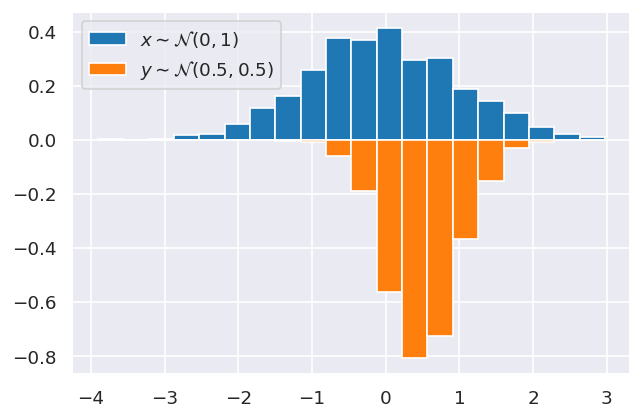

In [3]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0.5, 0.5, 1000)

bihistogram(
    x,
    y,
    toplabel=r"$x \sim \mathcal{N}(0,1)$",
    botlabel=r"$y \sim \mathcal{N}(0.5,0.5)$",
    bins=20,
    density=True,
)
plt.legend()

# Bihistogram Ceramic Strength

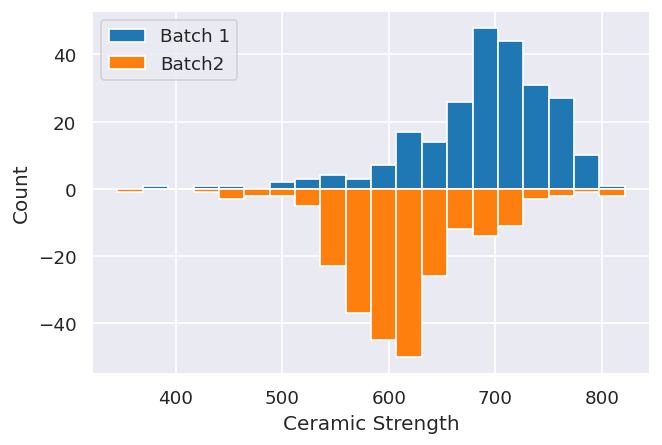

In [4]:
df: pd.DataFrame = pd.read_csv("../datasets/jahnmi2.csv")

batch1 = df.loc[df.Bat == 1, "Y"].values
batch2 = df.loc[df.Bat == 2, "Y"].values

bihistogram(batch1, batch2, toplabel="Batch 1", botlabel="Batch2", bins=20)
_ = plt.legend()
_ = plt.xlabel("Ceramic Strength")
_ = plt.ylabel("Count")